In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
import os
import warnings

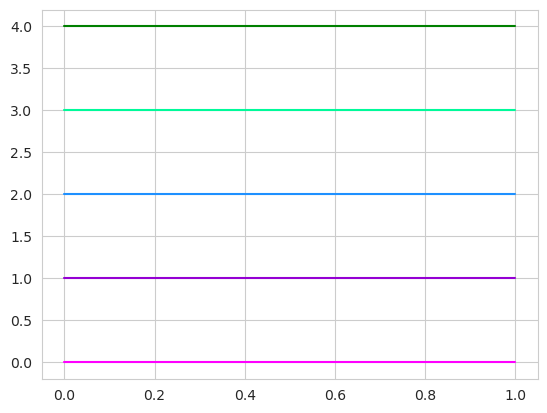

In [3]:
colors = ['fuchsia',
          'darkviolet',
          'dodgerblue',
          'mediumspringgreen',
          'g']

#colors = colors[:3]

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

for i in range(len(colors)):
    plt.plot([0, 1], [i, i])

plt.show()

new_cmap = mpl.colors.ListedColormap(colors)

colors2 = [c for c in colors]
colors2.insert(0, 'k')
new_cmap2 = mpl.colors.ListedColormap(colors2)

In [4]:
os.chdir('/project/ssverma_shared/projects/Endometriosis/Endo_Subtyping_Heterogeneity/Cluster_Heterogeneity/')

In [5]:
rahmioglu_b38 = pd.read_table('../Locus_Extraction/Rahmioglu_snps_b38.bed', index_col=3, header=None)
# rahmioglu_b38 = rahmioglu_b38.rename({'rs7334326': 'rs9568405'})
# rahmioglu_b38.loc['rs9568405', 1] = 50405519
rahmioglu = pd.read_csv('Rahmioglu_processed_signals.csv', index_col='Lead SNP').rename(columns={'Unnamed: 0': 'Signal'})
# rahmioglu = rahmioglu.rename({'rs7334326': 'rs9568405'})

rahmioglu['Position (b38)'] = rahmioglu_b38.loc[rahmioglu.index.intersection(rahmioglu_b38.index), 1]
rahmioglu['START'] = rahmioglu['Position (b38)'] - 5E5
rahmioglu['STOP'] = rahmioglu['Position (b38)'] + 5E5
rahmioglu = rahmioglu[~rahmioglu['Chr'].isin(['X'])]
rahmioglu['Chr'] = rahmioglu['Chr'].astype(int)

rahmioglu[['Chr', 'Position (b38)', 'START', 'STOP']] = rahmioglu[['Chr', 'Position (b38)', 'START', 'STOP']].astype(float)

print(len(rahmioglu))
rahmioglu = rahmioglu.dropna(subset=['Infertility_OR'])
print(len(rahmioglu))

sig_line = 0.05 / len(rahmioglu)
print(sig_line)
rahmioglu

41
39
0.001282051282051282


,Signal,Chr,Position (hg19),Overall_OR,Overall_P,EUR_RAF,EUR_OR,EUR_P,JPT_RAF,JPT_OR,...,Stage34_OR_CI,Stage34_BETA,Stage12_OR_CI,Stage12_BETA,Infertility_OR_CI,Infertility_BETA,Risk_Allele,Position (b38),START,STOP
Lead SNP,,,,,,,,,,,,,,,,,,,,,
rs10917151,WNT4/1p36.12,1.0,22422721.0,1.14,5.08x10-44,0.16,1.14,3.64x10-41,0.57,1.27,...,(1.16-1.31),0.207014,(1.08-1.24),0.148420,(1.13-1.31),0.190620,A,22096228.0,21596228.0,22596228.0
rs12030576,NGF/1p13.2,1.0,115817221.0,1.06,3.34x10-13,0.65,1.06,1.91x10-13,0.41,0.99,...,(0.97-1.08),0.029559,(1.02-1.15),0.086178,(0.98-1.11),0.039221,G,115274600.0,114774600.0,115774600.0
rs2040445,SLC19A2/1q24.2,1.0,169216412.0,1.17,1.40x10-10,0.97,1.17,1.96x10-10,NaN,NaN,...,(1.28-1.83),0.425268,(0.84-1.24),0.019803,(1.07-1.55),0.254642,G,169247174.0,168747174.0,169747174.0
rs2421985,DNM3/1q24.3,1.0,172099136.0,1.05,6.73x10-14,0.49,1.05,1.72x10-12,0.77,1.28,...,(1.04-1.14),0.086178,(0.97-1.07),0.019803,(0.96-1.07),0.009950,C,172129996.0,171629996.0,172629996.0
rs11674184,GREB1/2p25.1,2.0,11721535.0,1.08,3.16x10-26,0.61,1.08,5.91x10-24,0.54,1.25,...,(1.10-1.22),0.148420,(1.02-1.14),0.067659,(0.99-1.12),0.048790,T,11581409.0,11081409.0,12081409.0
rs1430787,ETAA1/2p14,2.0,67868498.0,1.04,9.65x10-9,0.31,1.04,4.56x10-8,0.22,1.17,...,(1.05-1.16),0.095310,(1.02-1.14),0.076961,(1.01-1.14),0.067659,A,67641366.0,67141366.0,68141366.0
rs6435157,BMPR2/2q33.1,2.0,203441224.0,1.05,4.97x10-8,0.77,1.05,1.12x10-7,0.97,1.42,...,(1.06-1.19),0.122218,(1.01-1.15),0.076961,(1.07-1.22),0.131028,T,202576501.0,202076501.0,203076501.0
rs1352889,BSN/3p21.31,3.0,49652148.0,1.05,2.79x10-8,0.17,1.05,2.79x10-8,NaN,NaN,...,(0.95-1.08),0.019803,(0.98-1.13),0.048790,(0.98-1.13),0.048790,T,49614715.0,49114715.0,50114715.0
rs1903068,KDR/4q12,4.0,56008477.0,1.08,1.55x10-24,0.68,1.08,1.78x10-24,0.88,1.09,...,(1.16-1.29),0.198851,(1.03-1.15),0.086178,(1.05-1.18),0.104360,A,55142310.0,54642310.0,55642310.0


In [6]:
snp_annot = pd.read_csv('../1KG_LD_Testing/Annotations/tags_biofilter_genes_rsids.csv')
snp_annot = snp_annot.set_index(['#CHROM', 'POS'])
snp_annot = snp_annot[~snp_annot.index.duplicated(keep='first')]
snp_annot

Var_ID         RSID         Gene
#CHROM POS                                         
1      21686033      snp1   rs12043791        USP48
       21720782      snp2   rs12029478        USP48
       21722171      snp3   rs12030578        USP48
       21772447      snp4   rs10917041        USP48
       21779075      snp5    rs6664248        USP48
...                   ...          ...          ...
19     8703043   snp11791     rs301404  ACTL9/OR2Z1
       8703125   snp11792   rs35276077  ACTL9/OR2Z1
       8704019   snp11793  rs111407982  ACTL9/OR2Z1
       8708507   snp11794   rs10406865  ACTL9/OR2Z1
       8708650   snp11795   rs10411579  ACTL9/OR2Z1

[11792 rows x 3 columns]

In [7]:
meta_group = 'AFR_EUR' # ALL, AFR_EUR, EUR

phenos = ['endometriosis',
          'cluster_vs_controls_1',
          'cluster_vs_controls_2',
          'cluster_vs_controls_3',
          'cluster_vs_controls_4',
          'cluster_vs_controls_5']

In [8]:
dfs = []
for p in phenos:
    f = f'Meta_Output/{p}.{meta_group}.PLINK.meta'
    temp = pd.read_table(f, sep='\s+', nrows=None, index_col=['CHR', 'BP'])
    temp['RSID'] = snp_annot.reindex(temp.index)['RSID'].values
    temp['PHENO'] = p
    temp = temp.reset_index()
    dfs.append(temp)

df = pd.concat(dfs)
df[['CHR', 'POS', 'REF', 'ALT']] = df['SNP'].str.replace('chr', '').str.split(':', expand=True)
df[['CHR', 'POS']] = df[['CHR', 'POS']].astype(int)

def get_chr_pos_signal(x):
    keep_index = rahmioglu[(rahmioglu['Chr'] == x['CHR']) &
                           (rahmioglu['START'] < x['POS']) &
                           (rahmioglu['STOP'] > x['POS'])].index
    if len(keep_index) == 0:
        return np.nan
    else:
        return keep_index[0]

df['Signal_RSID'] = df[['CHR', 'POS']].apply(lambda x: get_chr_pos_signal(x), axis=1)
df = df.dropna(subset=['Signal_RSID'])

if meta_group in ['EUR', 'AFR']:
    p_col, or_col = 'P', 'OR'
    model_used = 'Fixed-Effect'
    m_u = 'FE'
else:
    p_col, or_col = 'P(R)', 'OR(R)'
    model_used = 'Random-Effect'
    m_u = 'RE'

df['Signal'] = rahmioglu.loc[df['Signal_RSID'], 'Signal'].values
df['LOGP'] = -np.log10(df[p_col])
df = df.sort_values(by=['CHR', 'POS']).reset_index(drop=True)
df['BETA'] = np.log(df[or_col])
df['Direction'] = np.sign(df['BETA'])
df['Z'] = df['Direction'] * np.abs(norm.ppf(df[p_col] / 2))
df['SE'] = df['BETA'] / df['Z']
df['CI_L'] = df['BETA'] - (1.96 * df['SE'])
df['CI_U'] = df['BETA'] + (1.96 * df['SE'])

df['CI_OR_L'] = np.exp(df['CI_L'])
df['CI_OR_U'] = np.exp(df['CI_U'])

df

,CHR,BP,SNP,A1,A2,N,P,P(R),OR,OR(R),...,Signal,LOGP,BETA,Direction,Z,SE,CI_L,CI_U,CI_OR_L,CI_OR_U
0,1,21686033,chr1:21686033:C:T,T,?,4,0.4781,0.4612,0.9722,0.9679,...,WNT4/1p36.12,0.336111,-0.032627,-1.0,-0.736872,0.044277,-0.119409,0.054156,0.887444,1.055650
1,1,21686033,chr1:21686033:C:T,T,?,4,0.9722,0.7740,1.0030,1.0372,...,WNT4/1p36.12,0.111259,0.036525,1.0,0.287147,0.127199,-0.212785,0.285835,0.808330,1.330873
2,1,21686033,chr1:21686033:C:T,T,?,4,0.4397,0.4397,0.9353,0.9353,...,WNT4/1p36.12,0.356844,-0.066888,-1.0,-0.772700,0.086564,-0.236553,0.102777,0.789344,1.108245
3,1,21686033,chr1:21686033:C:T,T,?,4,0.0147,0.0147,0.7694,0.7694,...,WNT4/1p36.12,1.832683,-0.262144,-1.0,-2.439687,0.107450,-0.472746,-0.051542,0.623288,0.949763
4,1,21686033,chr1:21686033:C:T,T,?,4,0.5580,0.8420,1.0410,0.9783,...,WNT4/1p36.12,0.074688,-0.021939,-1.0,-0.199336,0.110060,-0.237656,0.193779,0.788473,1.213828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58712,19,8704019,chr19:8704019:C:T,T,?,4,0.9170,0.9170,1.0087,1.0087,...,ACTL9/19p13.2,0.037631,0.008662,1.0,0.104213,0.083121,-0.154256,0.171580,0.857053,1.187180
58713,19,8704019,chr19:8704019:C:T,T,?,4,0.4160,0.4160,1.0698,1.0698,...,ACTL9/19p13.2,0.380907,0.067472,1.0,0.813380,0.082952,-0.095115,0.230058,0.909269,1.258673
58714,19,8704019,chr19:8704019:C:T,T,?,4,0.5312,0.5312,1.0541,1.0541,...,ACTL9/19p13.2,0.274742,0.052687,1.0,0.626175,0.084141,-0.112230,0.217605,0.893839,1.243096
58715,19,8704019,chr19:8704019:C:T,T,?,4,0.4783,0.3872,1.0480,1.0822,...,ACTL9/19p13.2,0.412065,0.078996,1.0,0.864706,0.091356,-0.100062,0.258054,0.904782,1.294408


In [9]:
pheno_map = {'cluster_vs_controls_0': '1: reproductive health',
             'cluster_vs_controls_1': '2: uterine health',
             'cluster_vs_controls_2': '3: EHR-asymptomatic',
             'cluster_vs_controls_3': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_4': '5: indeterminate',
             'endometriosis': '0: baseline endometriosis'}

pheno_map = {'cluster_vs_controls_1': '1: lesser-known symptoms and comorbidities',
             'cluster_vs_controls_2': '2: typical symptomatic endo presentation',
             'cluster_vs_controls_3': '3: low symptomatic',
             'endometriosis': '0: baseline endometriosis'}

pheno_map = {'cluster_vs_controls_1': '1: many comorbidities',
             'cluster_vs_controls_2': '2: adenomyosis and fibroids',
             'cluster_vs_controls_3': '3: pain and infertility',
             'cluster_vs_controls_4': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_5': '5: EHR-asymptomatic',
             'endometriosis': '0: baseline endometriosis'}
# pheno_map = dict(zip(phenos, phenos))

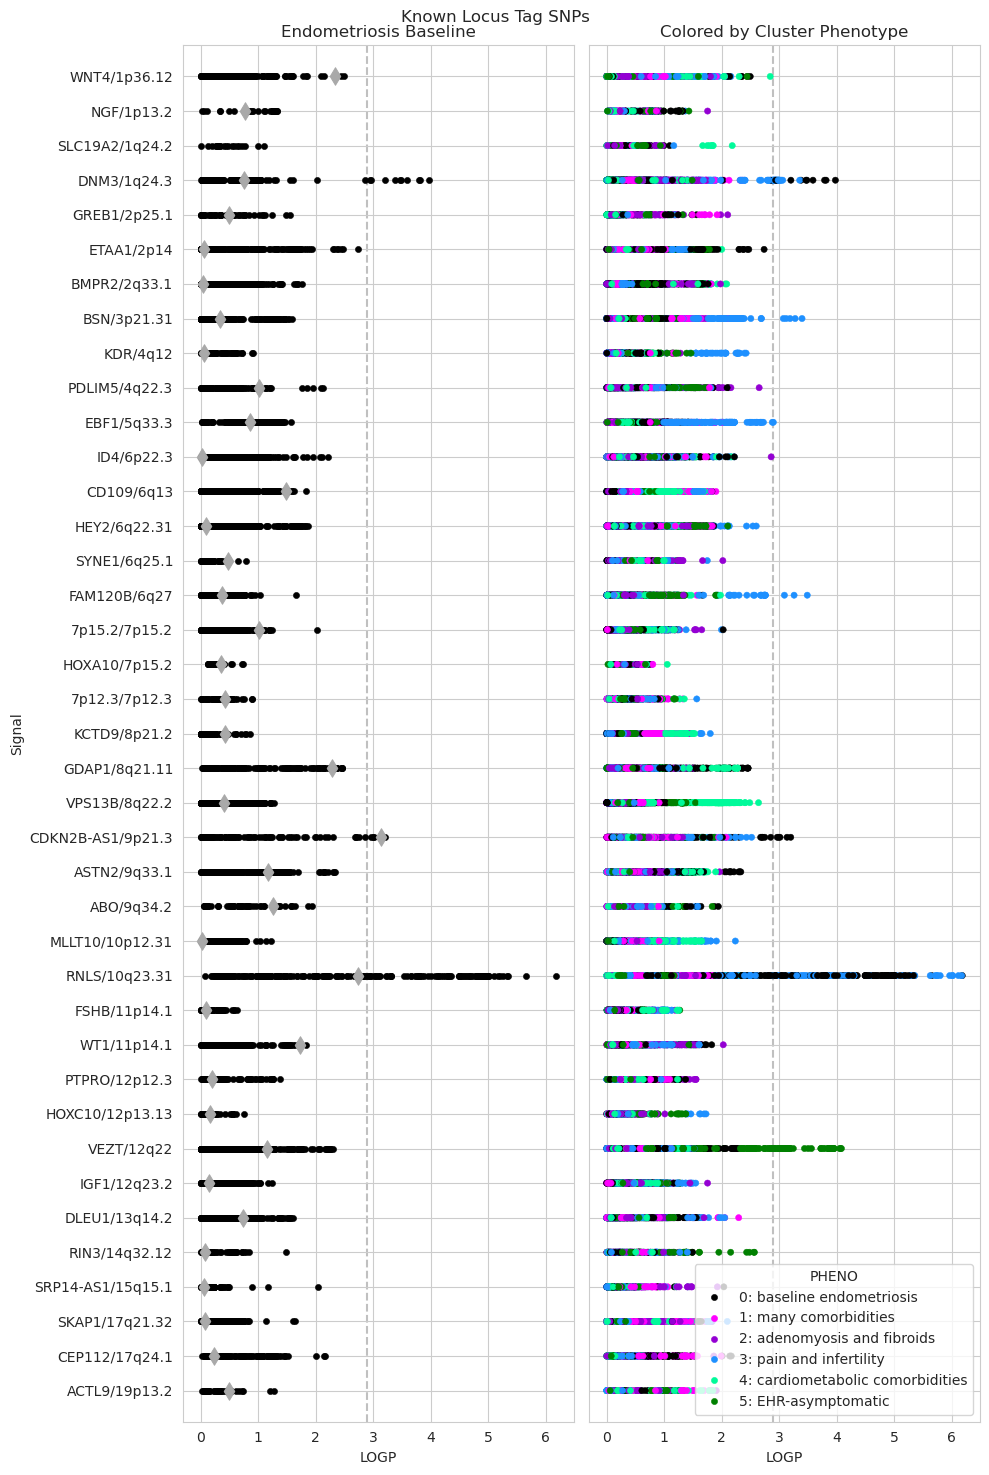

In [10]:
os.makedirs('Plots', exist_ok=True)

fig, axes = plt.subplots(ncols=2, sharey=True)

ax = axes[0]

fig.set_size_inches(10, 15)
plot_df = df.copy()
plot_df = plot_df[plot_df['PHENO'] == 'endometriosis']
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
sns.scatterplot(data=plot_df, y='Signal', x='LOGP', color='k', edgecolor=None, s=20, legend=False, ax=ax)

# Lead SNPs
plot_df2 = df.set_index(['CHR', 'BP'])
plot_df2 = plot_df2.loc[plot_df2.index.isin(rahmioglu.reset_index().set_index(['Chr', 'Position (b38)']).index)]
plot_df2 = plot_df2[plot_df2['PHENO'] == 'endometriosis']
sns.scatterplot(data=plot_df2, y='Signal', x='LOGP', color='darkgray', edgecolor=None, s=80, legend=False, marker='d', ax=ax)

ax.axvline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

top, bottom = ax.get_ylim()
plt.gca().set_ylim(top-0.5, bottom+0.5)

ax.set_title(f'Endometriosis Baseline')

os.makedirs('Plots', exist_ok=True)

ax = axes[1]
plot_df = df.copy()
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
sns.scatterplot(data=plot_df, y='Signal', x='LOGP', hue='PHENO',
                palette=colors2, edgecolor=None, s=20, ax=ax)

ax.axvline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

top, bottom = plt.gca().get_ylim()
ax.set_ylim(top-0.5, bottom+0.5)

ax.set_title(f'Colored by Cluster Phenotype')
fig.suptitle('Known Locus Tag SNPs')
plt.tight_layout()
plt.savefig(f'Plots/{meta_group}_signal_manhattan_plot_{m_u}_two_panes.png', bbox_inches='tight')
plt.show()

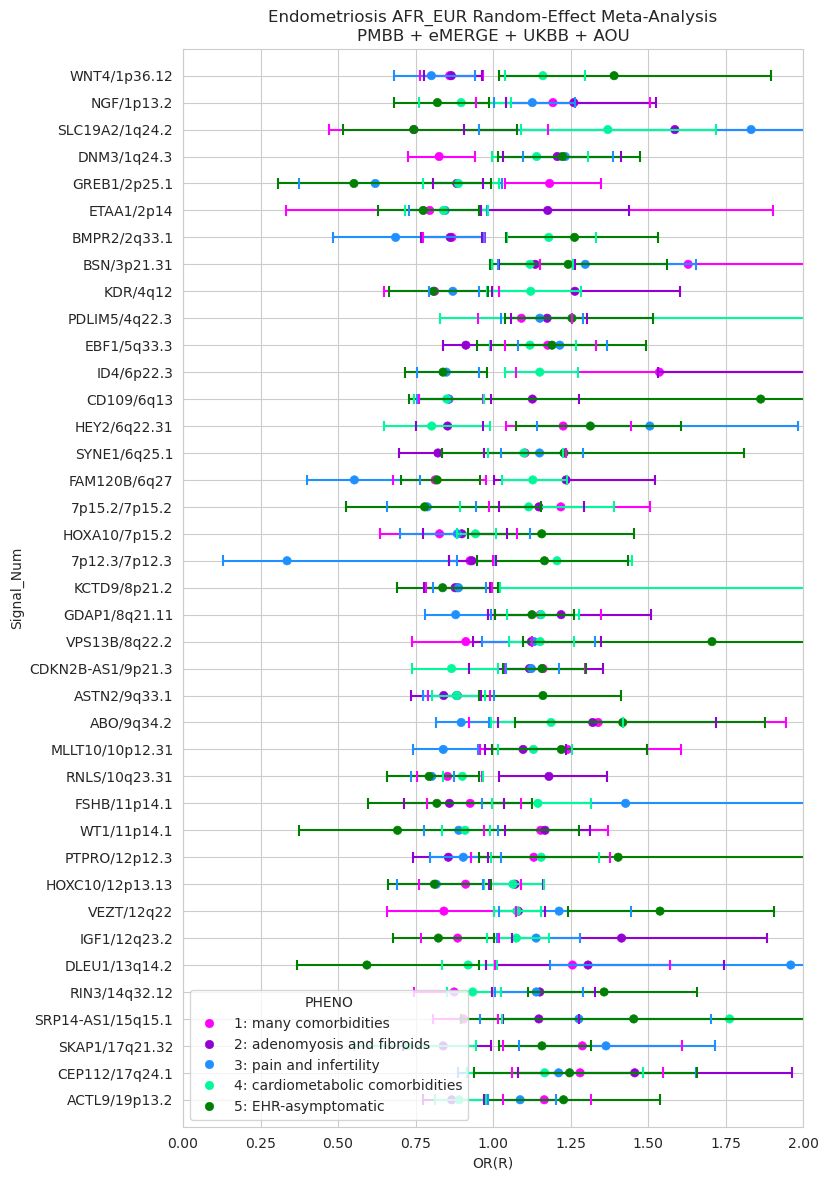

29014    G
29015    G
29298    A
29065    A
29012    G
Name: A1, dtype: object
28564    T
27505    G
27996    G
28651    G
27729    G
Name: A1, dtype: object
40323    T
39912    A
40247    C
40326    T
40255    T
Name: A1, dtype: object
58635    C
58619    G
58448    A
58703    A
58591    T
Name: A1, dtype: object
37708    C
39865    C
38901    T
39891    T
39850    G
Name: A1, dtype: object
6236    A
6045    A
6244    A
6005    C
6096    A
Name: A1, dtype: object
7825     T
9737     T
10195    C
10512    A
10893    T
Name: A1, dtype: object
18638    C
18819    G
20696    T
20374    C
19662    A
Name: A1, dtype: object
37075    C
36848    G
36717    T
36688    A
37079    C
Name: A1, dtype: object
58300    T
58115    C
58290    C
57731    T
58034    C
Name: A1, dtype: object
51626    A
51537    C
52328    T
52012    T
52127    T
Name: A1, dtype: object
3092    A
3391    G
3374    T
3351    G
3561    C
Name: A1, dtype: object
14255    A
13777    A
12905    G
13169    A
14684    C
Name: A

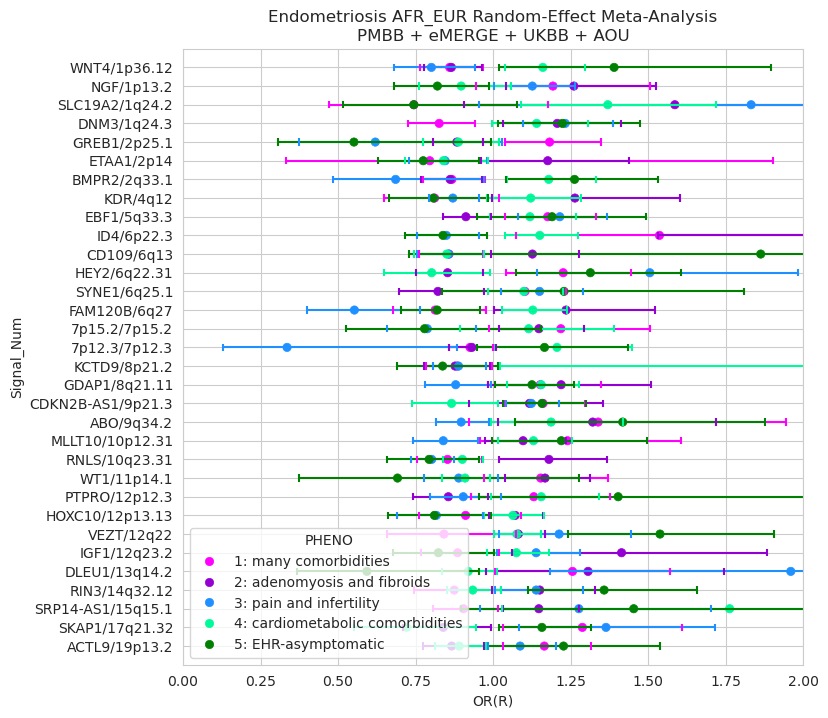

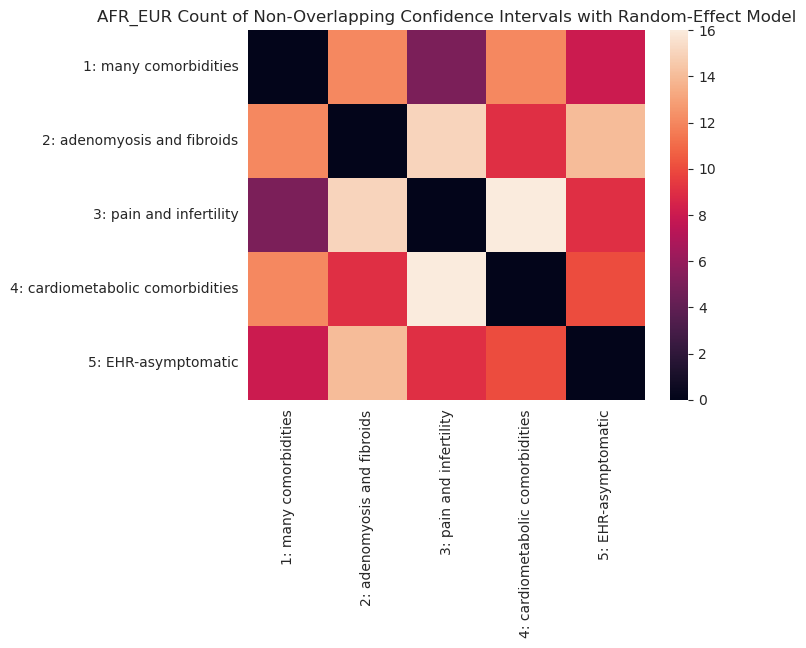

<Figure size 640x480 with 0 Axes>

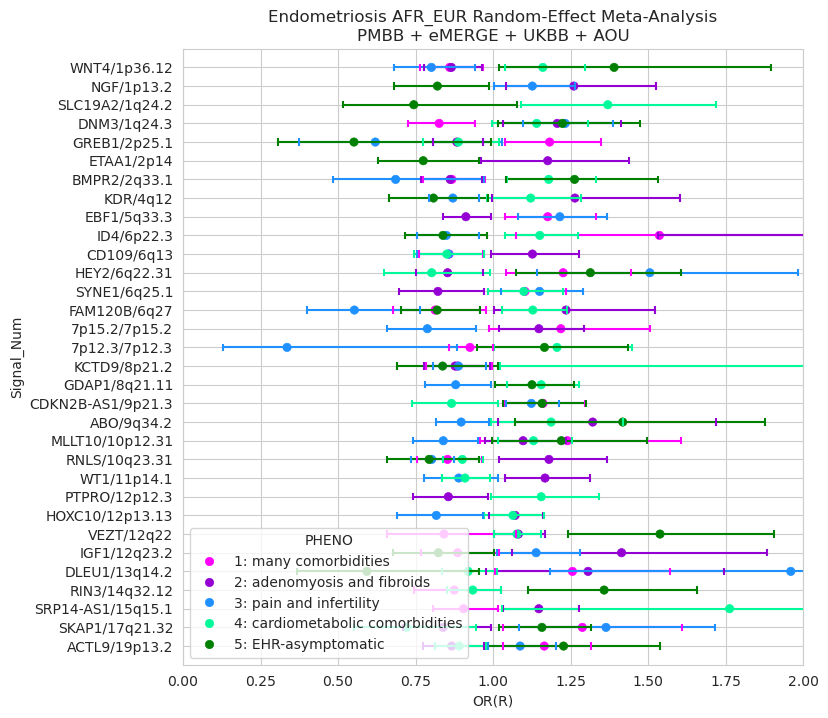

In [11]:
plot_df = df.copy()

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

# keep_snps = plot_df[plot_df['PHENO'] == 'endometriosis'].sort_values(by='P').drop_duplicates(subset=['Signal'], keep='first')['SNP'].unique()
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['PHENO', 'Signal'], keep='first')

# plot_df = plot_df[plot_df.set_index(['CHR', 'BP']).index.isin(rahmioglu.reset_index().set_index(['Chr', 'Position (b38)']).index)]

plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
plot_df = plot_df[plot_df['PHENO'] != '0: baseline endometriosis']
plot_df = plot_df.sort_values(by=['CHR', 'BP'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8, 14)

signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')
pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

tick_width = 0.2
use_cmap = new_cmap
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[use_cmap(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[use_cmap(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[use_cmap(pheno_i[p]) for p in plot_df['PHENO']])

use_colors = colors
sns.scatterplot(data=plot_df, y='Signal_Num', x=or_col, hue='PHENO',
                palette=use_colors, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
# ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} {model_used} Meta-Analysis\nPMBB + eMERGE + UKBB + AOU')
ax.set_ylim(-1, max(signal_num.values()) + 1)
ax.set_xlim(0, 2)

plt.savefig(f'Plots/{meta_group}_{m_u}_endo_manhattan_T.png', bbox_inches='tight')
plt.show()

keep_dfs = []
keep_dfs_disjoint_only = []

all_differences = pd.DataFrame(data=0, index=plot_df['PHENO'].unique(), columns=plot_df['PHENO'].unique())

for signal, subDF in plot_df.groupby('Signal'):
    M = len(subDF)
    print(subDF['A1'])

    lower_2D_1 = np.broadcast_to(subDF['CI_OR_L'], (M,M))
    lower_2D_2 = np.broadcast_to(subDF['CI_OR_L'], (M,M)).T
    upper_2D_1 = np.broadcast_to(subDF['CI_OR_U'], (M,M))
    upper_2D_2 = np.broadcast_to(subDF['CI_OR_U'], (M,M)).T

    overlap = ((lower_2D_1 <= upper_2D_2) & (upper_2D_1 >= upper_2D_2)) | \
              ((lower_2D_1 <= upper_2D_1) & (upper_2D_1 >= upper_2D_1))

    disjoint = ((lower_2D_1 > upper_2D_2) & (upper_2D_1 > upper_2D_2)) | \
               ((lower_2D_1 < lower_2D_2) & (upper_2D_1 < lower_2D_2))

    disjoint = pd.DataFrame(disjoint | disjoint.T, index=subDF['PHENO'], columns=subDF['PHENO'])
    disjoint = disjoint.reindex_like(all_differences)
    all_differences += disjoint.fillna(0).astype(int)

    if np.any(disjoint):
        keep_phenos = disjoint.index
        keep_dfs.append(subDF[subDF['PHENO'].isin(keep_phenos)])

        keep_phenos_disjoint_only = disjoint.index[disjoint.apply(lambda x: np.any(x), axis=1)]
        keep_dfs_disjoint_only.append(subDF[subDF['PHENO'].isin(keep_phenos_disjoint_only)])

plot_df = pd.concat(keep_dfs)
plot_df_disjoint_only = pd.concat(keep_dfs_disjoint_only)

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

plot_df = plot_df.sort_values(by=['CHR', 'BP'], ascending=False)
signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')
pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

colors3 = [colors2[i] for i in range(len(colors2)) if sorted(list(pheno_map.values()))[i] in plot_df['PHENO'].unique()]
new_cmap3 = mpl.colors.ListedColormap(colors3)

tick_width = 0.2
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])


sns.scatterplot(data=plot_df, y='Signal_Num', x=or_col, hue='PHENO',
                palette=colors3, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
# ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} {model_used} Meta-Analysis\nPMBB + eMERGE + UKBB + AOU')
ax.set_ylim(-1, max(signal_num.values()) + 1)
ax.set_xlim(0, 2)

# plt.axvline(1, c='k', zorder=-10, linewidth=3)

plt.savefig(f'Plots/{meta_group}_{m_u}_disjoint_endo_manhattan_T.png', bbox_inches='tight')
plt.show()
plt.clf()

sns.heatmap(all_differences.sort_index().sort_index(axis=1))
plt.title(f'{meta_group} Count of Non-Overlapping Confidence Intervals with {model_used} Model')
plt.savefig(f'Plots/{meta_group}_{m_u}_pheno_diff_heatmap.png', bbox_inches='tight')
plt.show()
plt.clf()

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

plot_df = plot_df_disjoint_only.sort_values(by=['CHR', 'BP'], ascending=False)
signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')
pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

colors3 = [colors2[i] for i in range(len(colors2)) if sorted(list(pheno_map.values()))[i] in plot_df['PHENO'].unique()]
new_cmap3 = mpl.colors.ListedColormap(colors3)

tick_width = 0.2
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])


sns.scatterplot(data=plot_df, y='Signal_Num', x=or_col, hue='PHENO',
                palette=colors3, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
# ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} {model_used} Meta-Analysis\nPMBB + eMERGE + UKBB + AOU')
ax.set_ylim(-1, max(signal_num.values()) + 1)
ax.set_xlim(0, 2)

# plt.axvline(1, c='k', zorder=-10, linewidth=3)

plt.savefig(f'Plots/{meta_group}_{m_u}_disjoint_endo_manhattan_T_disjoint_only.png', bbox_inches='tight')
plt.show()

PHENO       0: baseline endometriosis  1: many comorbidities  \
Signal_Num                                                     
0                            1.266482               1.836242   
1                            1.225556               1.989700   
2                            1.643592               1.591082   
3                            2.035599               1.062231   
4                            1.492009               0.991826   
5                            0.827981               1.347560   
6                            1.165261               1.032686   
7                            2.300076               0.775208   
8                            0.757707               0.507938   
9                            1.371509               0.664141   
10                           1.825359               0.981300   
11                           0.309715               0.453087   
12                           6.181840               1.952725   
13                           1.230770   

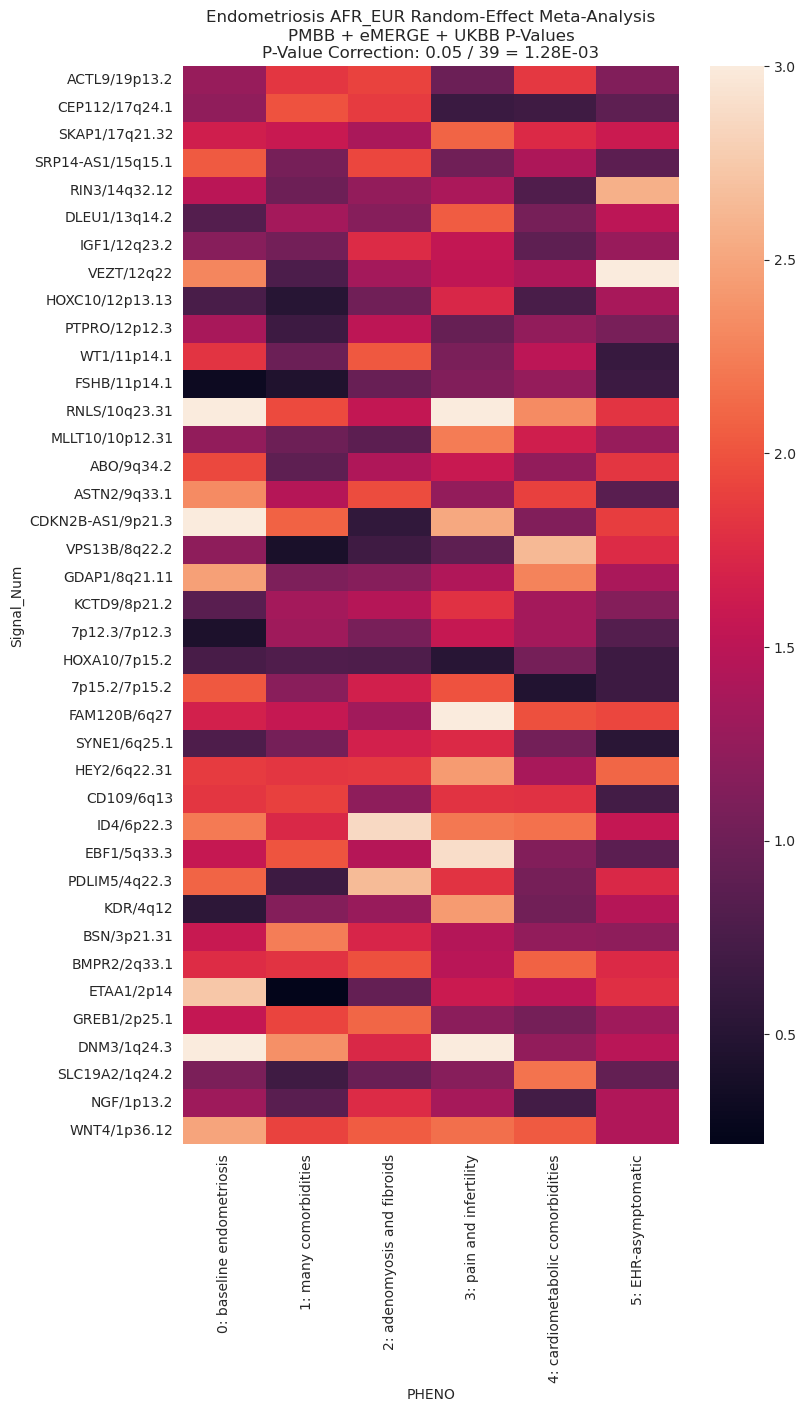

In [12]:
pheno_map = {'cluster_vs_controls_0': '1: reproductive health',
             'cluster_vs_controls_1': '2: uterine health',
             'cluster_vs_controls_2': '3: EHR-asymptomatic',
             'cluster_vs_controls_3': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_4': '5: indeterminate',
             'endometriosis': '0: baseline endometriosis'}

pheno_map = {'cluster_vs_controls_1': '1: lesser-known symptoms and comorbidities',
             'cluster_vs_controls_2': '2: typical symptomatic endo presentation',
             'cluster_vs_controls_3': '3: low symptomatic',
             'endometriosis': '0: baseline endometriosis'}

pheno_map = {'cluster_vs_controls_1': '1: many comorbidities',
             'cluster_vs_controls_2': '2: adenomyosis and fibroids',
             'cluster_vs_controls_3': '3: pain and infertility',
             'cluster_vs_controls_4': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_5': '5: EHR-asymptomatic',
             'endometriosis': '0: baseline endometriosis'}
# pheno_map = dict(zip(phenos, phenos))

plot_df = df.copy()

p_thresh = 0.05 / len(rahmioglu)
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

# keep_snps = plot_df[plot_df['PHENO'] == 'endometriosis'].sort_values(by='P').drop_duplicates(subset=['Signal'], keep='first')['SNP'].unique()
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]
# plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['PHENO', 'Signal'], keep='first')

plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
# plot_df = plot_df[plot_df['PHENO'] != '0: baseline endometriosis']
plot_df = plot_df.sort_values(by=['CHR', 'BP'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8, 14)

signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')
pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

tick_width = 0.2
use_cmap = new_cmap

use_colors = colors

plot_df = plot_df.pivot(index='Signal_Num', columns='PHENO', values='LOGP')
print(plot_df)


sns.heatmap(plot_df, vmax=3)

ax.set_yticks([v + 0.5 for v in list(signal_num.values())])
ax.set_yticklabels(list(signal_num.keys()), rotation=0)
p_thresh = 0.05 / len(rahmioglu)
ax.set_title(f'Endometriosis {meta_group} {model_used} Meta-Analysis\nPMBB + eMERGE + UKBB P-Values\nP-Value Correction: 0.05 / {len(rahmioglu)} = {p_thresh:.2E}')


print((plot_df > -np.log10(p_thresh)).apply(lambda x: x.value_counts(), result_type='expand').transpose())

plt.savefig(f'Plots/{meta_group}_{m_u}_endo_logp_heatmap.png', bbox_inches='tight')
plt.show()

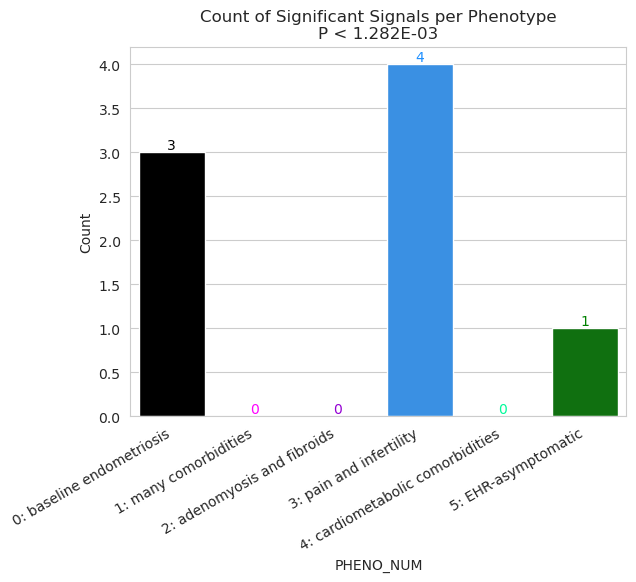

In [13]:
plot_df = df.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]


# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)

colors4 = [c if c != 'k' else 'w' for c in colors2]

fig, ax = plt.subplots()

sig_counts = pd.DataFrame(columns=['0.05', 'BF-Corrected'])
for pheno, subDF in plot_df.groupby('PHENO'):
    count1 = (subDF[p_col] < p_thresh).astype(int).sum()
    sig_counts.loc[pheno_num[pheno], 'BF-Corrected'] = count1
    count2 = (subDF[p_col] < 0.05).sum()
    sig_counts.loc[pheno_num[pheno], '0.05'] = count2
    ax.text(pheno_num[pheno], count1, f'{count1}',
            color=colors2[pheno_num[pheno]], ha='center', va='bottom')

sig_counts.index.name = 'PHENO_NUM'
sig_counts = sig_counts.reset_index()

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

sns.barplot(data=sig_counts, x='PHENO_NUM', y='BF-Corrected',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=1,
            ax=ax, legend=False)

# ax.set_ylim(0, 35)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'Count of Significant Signals per Phenotype\nP < {p_thresh:.3E}')
ax.set_ylabel('Count')

ax.set_xticks(np.arange(len(pheno_num)))
ax.set_xticklabels(pheno_num.keys(), rotation=30, ha='right')

plt.savefig(f'Plots/{meta_group}_{m_u}_sig_signal_counts.png', bbox_inches='tight')
plt.show()

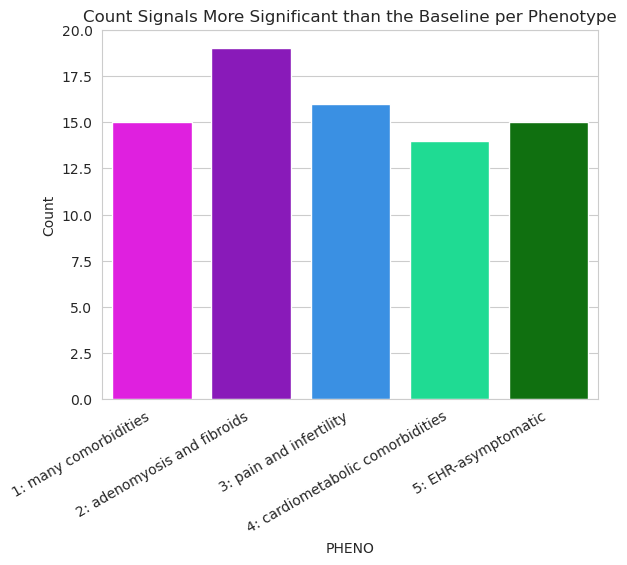

In [14]:
plot_df = df.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]


# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)
plot_df = plot_df.pivot_table(columns='PHENO', index='Signal', values=p_col)
plot_df = plot_df.apply(lambda x: x < plot_df['0: baseline endometriosis'])

colors4 = [c if c != 'k' else 'w' for c in colors2]

fig, ax = plt.subplots()

sig_counts = pd.DataFrame(index=plot_df.columns, columns=['Beats_Pos_Control'])

sig_counts.index.name = 'PHENO'
sig_counts['Beats_Pos_Control'] = plot_df.sum()
sig_counts = sig_counts.drop('0: baseline endometriosis')
sig_counts = sig_counts.reset_index()

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

sns.barplot(data=sig_counts, x='PHENO', y='Beats_Pos_Control',
            hue='PHENO', dodge=False,
            palette=colors, alpha=1,
            ax=ax, legend=False)

# ax.set_ylim(0, 35)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'Count Signals More Significant than the Baseline per Phenotype')
ax.set_ylabel('Count')

ax.set_xticks(np.arange(len(pheno_num)-1))
ax.set_ylim(0, 20)
ax.set_xticklabels([k for k in pheno_num.keys() if '0' not in k], rotation=30, ha='right')

plt.savefig(f'Plots/{meta_group}_{m_u}_beat_positive_control_counts.png', bbox_inches='tight')
plt.show()

                  Signal          P(R)
42608      RNLS/10q23.31  6.579000e-07
3263         DNM3/1q24.3  1.055000e-04
37104  CDKN2B-AS1/9p21.3  6.317000e-04
4054          ETAA1/2p14  1.834000e-03
1131        WNT4/1p36.12  3.195000e-03
31446      GDAP1/8q21.11  3.483000e-03
37983       ASTN2/9q33.1  4.661000e-03
47498         VEZT/12q22  5.011000e-03
18250         ID4/6p22.3  6.020000e-03
12333      PDLIM5/4q22.3  8.072000e-03
53825  SRP14-AS1/15q15.1  9.213000e-03
28629      7p15.2/7p15.2  9.441000e-03
40322         ABO/9q34.2  1.148000e-02
23229       HEY2/6q22.31  1.380000e-02
19285         CD109/6q13  1.481000e-02
44679        WT1/11p14.1  1.495000e-02
6337        BMPR2/2q33.1  1.727000e-02
26771       FAM120B/6q27  2.160000e-02
57710     SKAP1/17q21.32  2.272000e-02
9885         BSN/3p21.31  2.608000e-02
13704        EBF1/5q33.3  2.674000e-02
3898        GREB1/2p25.1  2.746000e-02
53645      RIN3/14q32.12  3.221000e-02
46730      PTPRO/12p12.3  4.251000e-02
1854          NGF/1p13.2 

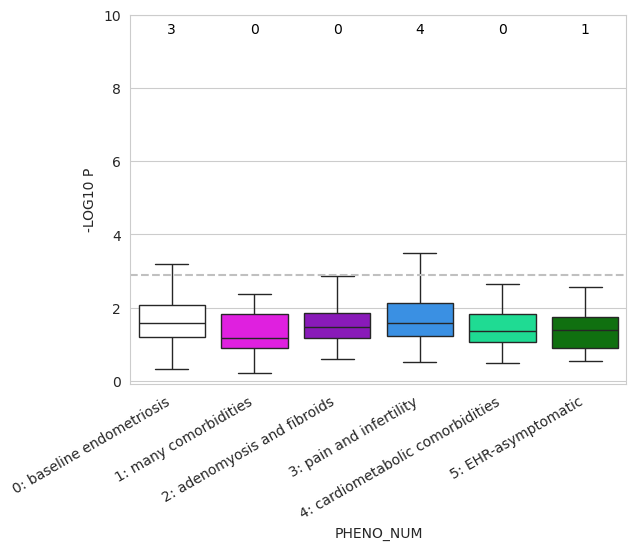

In [15]:
plot_df = df.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)

colors4 = [c if c != 'k' else 'w' for c in colors2]

fig, ax = plt.subplots()

bp = sns.boxplot(data=plot_df, x='PHENO_NUM', y='LOGP', hue='PHENO',
                 palette=colors4, dodge=False,
                 legend=False, ax=ax, showfliers=False,
                 whis=2)

ax.axhline(-np.log10(p_thresh), color='silver', linestyle='dashed')
# ax.axhline(-np.log10(0.05), color='springgreen', linestyle='dashed')
ax.set_xticks(np.arange(len(pheno_num)))
ax.set_xticklabels(pheno_num.keys(), rotation=30, ha='right')

ax.set_ylabel('-LOG10 P')

ax.set_ylim(-0.1, 10)

for pheno, subDF in plot_df.groupby('PHENO'):
    print(subDF[['Signal', p_col]].sort_values(by=p_col))
    count1 = (subDF[p_col] < p_thresh).sum()
    count2 = (subDF[p_col] < 0.05).sum()
    ax.text(pheno_num[pheno], 9.5, f'{count1}', color='k', ha='center')
    # ax.text(pheno_num[pheno], 4.6, f'{count2}', color='springgreen', ha='center')

plt.savefig(f'Plots/{meta_group}_{m_u}_log_p_box_plot.png', bbox_inches='tight')
plt.show()

(-4.0, 40.0)


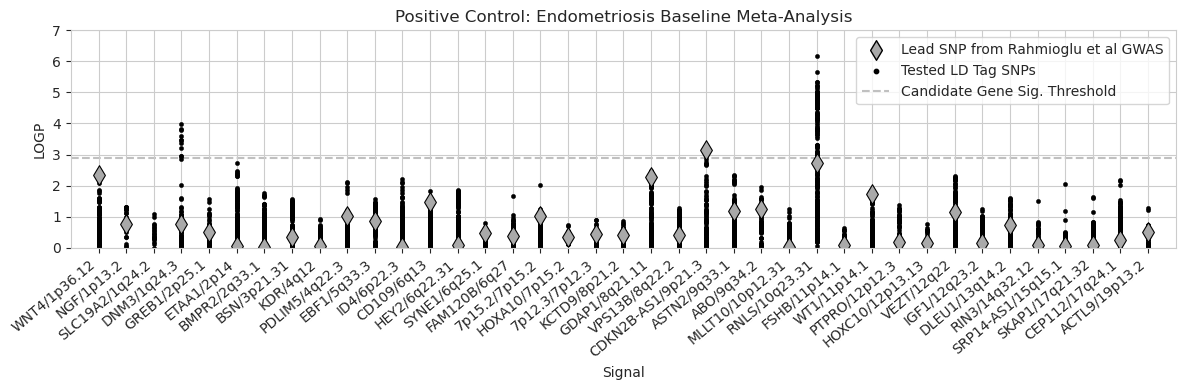

In [41]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 4)
plot_df = df.copy()
plot_df = plot_df[plot_df['PHENO'] == 'endometriosis']
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
sns.scatterplot(data=plot_df, x='Signal', y='LOGP', color='k', edgecolor=None, s=10, legend=False, ax=ax)

# Lead SNPs
plot_df2 = df.set_index(['CHR', 'BP'])
plot_df2 = plot_df2.loc[plot_df2.index.isin(rahmioglu.reset_index().set_index(['Chr', 'Position (b38)']).index)]
plot_df2 = plot_df2[plot_df2['PHENO'] == 'endometriosis']
sns.scatterplot(data=plot_df2, x='Signal', y='LOGP', color='darkgray', edgecolor='k', s=100, legend=False, marker='d', ax=ax)

ax.axhline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

ax.scatter(-2, -2, color='darkgray', edgecolor='k', s=100, marker='d', label='Lead SNP from Rahmioglu et al GWAS')
ax.scatter(-2, -2, color='k', s=10, label='Tested LD Tag SNPs')
ax.axhline(-2, color='silver', linestyle='dashed', label='Candidate Gene Sig. Threshold')
ax.legend()

ax.set_title(f'Positive Control: Endometriosis Baseline Meta-Analysis')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylim(0, 7)
print(ax.get_xlim())
ax.set_xlim(-1, 39)

ax.tick_params(axis='both', which='major', left=True, bottom=True)

plt.tight_layout()
plt.savefig(f'../Manuscript_Plots/figure_4_{meta_group}_positive_control_manhattan_plot.png', bbox_inches='tight')
plt.show()

(-1.9000000000000001, 39.9)
(-1.9000000000000001, 39.9)


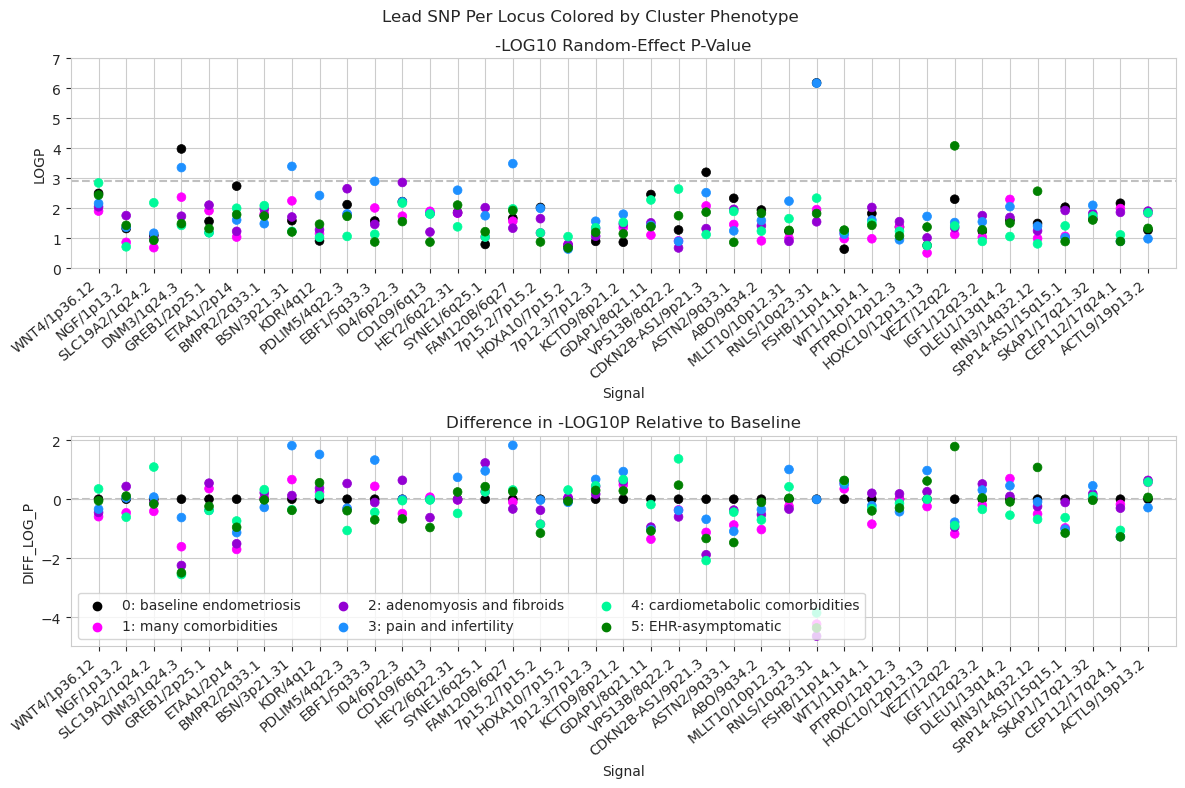

In [52]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(12, 8)
ax = axes[0]


plot_df = df.copy()
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['PHENO', 'Signal'])
plot_df = plot_df.sort_values(by=['PHENO', 'CHR', 'BP'])
sns.scatterplot(data=plot_df, x='Signal', y='LOGP', hue='PHENO',
                palette=colors2, edgecolor=None, s=40, ax=ax, legend=False)

ax.axhline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylim(0, 7)
print(ax.get_xlim())
ax.set_xlim(-1, 39)

ax.tick_params(axis='both', which='major', left=True, bottom=True)

ax.set_title(f'-LOG10 Random-Effect P-Value')

ax = axes[1]
plot_df = df.copy()
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['PHENO', 'Signal'])

subtrahend = plot_df[plot_df['PHENO'] == '0: baseline endometriosis'].set_index('Signal').loc[plot_df['Signal'], 'LOGP'].values
plot_df['DIFF_LOG_P'] = plot_df['LOGP'] - subtrahend

plot_df = plot_df.sort_values(by=['PHENO', 'CHR', 'BP'])
sns.scatterplot(data=plot_df, x='Signal', y='DIFF_LOG_P', hue='PHENO',
                palette=colors2, edgecolor=None, s=40, ax=ax, legend=False)

ax.axhline(0, c='silver', linestyle='dashed', zorder=-10)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
# ax.set_ylim(0, 7)
print(ax.get_xlim())
ax.set_xlim(-1, 39)


for i, pheno in enumerate(plot_df['PHENO'].unique()):
    ax.scatter(-2, -2, label=pheno, color=colors2[i])

ax.legend(ncols=3)

ax.tick_params(axis='both', which='major', left=True, bottom=True)

ax.set_title(f'Difference in -LOG10P Relative to Baseline')
plt.suptitle(f'Lead SNP Per Locus Colored by Cluster Phenotype')


plt.tight_layout()
plt.savefig(f'../Manuscript_Plots/figure_5_{meta_group}_cluster_p_value_plot.png', bbox_inches='tight')
plt.show()

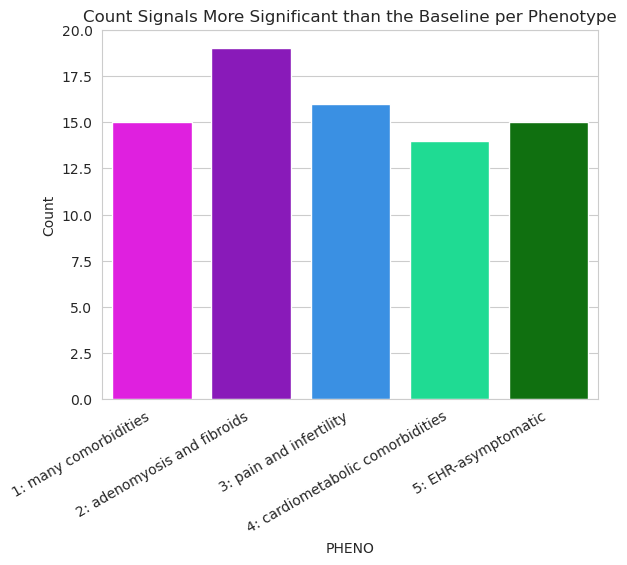

In [53]:
plot_df = df.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]


# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)
plot_df = plot_df.pivot_table(columns='PHENO', index='Signal', values=p_col)
plot_df = plot_df.apply(lambda x: x < plot_df['0: baseline endometriosis'])

colors4 = [c if c != 'k' else 'w' for c in colors2]

fig, ax = plt.subplots()

sig_counts = pd.DataFrame(index=plot_df.columns, columns=['Beats_Pos_Control'])

sig_counts.index.name = 'PHENO'
sig_counts['Beats_Pos_Control'] = plot_df.sum()
sig_counts = sig_counts.drop('0: baseline endometriosis')
sig_counts = sig_counts.reset_index()

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

sns.barplot(data=sig_counts, x='PHENO', y='Beats_Pos_Control',
            hue='PHENO', dodge=False,
            palette=colors, alpha=1,
            ax=ax, legend=False)

# ax.set_ylim(0, 35)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'Count Signals More Significant than the Baseline per Phenotype')
ax.set_ylabel('Count')

ax.set_xticks(np.arange(len(pheno_num)-1))
ax.set_ylim(0, 20)
ax.set_xticklabels([k for k in pheno_num.keys() if '0' not in k], rotation=30, ha='right')

plt.savefig(f'../Manuscript_Plots/figure_6_{meta_group}_beat_positive_control_counts.png', bbox_inches='tight')
plt.show()